## PERMASALAHAN DAN METODELOGI

### PERMASALAHAN :
- Perusahaan ingin mengetahui apakah terdapat perbedaan antara penggunaan iklan biasa dan Public Service Announcement atau Pengumuman Layanan Publik dan mencari penggunaan iklan mana yang paling efektif.

### METODELOGI :
- melakukan pengecekan data untuk memudahkan pada tahap selanjutnya.
- melakukan A/B testing untuk melihat perbedaan antar 2 kelompok test group.
- melakukan visualisasi pada data untuk mendapatkan insight yang berguna untuk pembuatan kebijakan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import missingno as msno
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
df = pd.read_csv('Documents\datasets\marketing_AB.csv')


## DATA QUALITY CHECKING

In [2]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [3]:
df.tail()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23
588100,588100,1237779,ad,False,1,Tuesday,23


In [4]:
df1 = df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


data converted masih bertipe boolean dan harus diubah ke integer untuk memudahkan analisis 

In [6]:
df.describe(include='all')

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
count,588101.000000,5.881010e+05,588101,588101,588101.000000,588101,588101.000000
unique,NaN,NaN,2,2,NaN,7,NaN
top,NaN,NaN,ad,False,NaN,Friday,NaN
freq,NaN,NaN,564577,573258,NaN,92608,NaN
mean,294050.000000,1.310692e+06,NaN,NaN,24.820876,NaN,14.469061
std,169770.279667,2.022260e+05,NaN,NaN,43.715181,NaN,4.834634
min,0.000000,9.000000e+05,NaN,NaN,1.000000,NaN,0.000000
25%,147025.000000,1.143190e+06,NaN,NaN,4.000000,NaN,11.000000
50%,294050.000000,1.313725e+06,NaN,NaN,13.000000,NaN,14.000000
75%,441075.000000,1.484088e+06,NaN,NaN,27.000000,NaN,18.000000


In [7]:
#mengubah data converted yangbertipe boolean menjadi integer
df['converted'] = np.where(df['converted']==True,1,0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  int32 
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: int32(1), int64(4), object(2)
memory usage: 29.2+ MB


tipe data converted sudah menjadi integer

<Axes: >

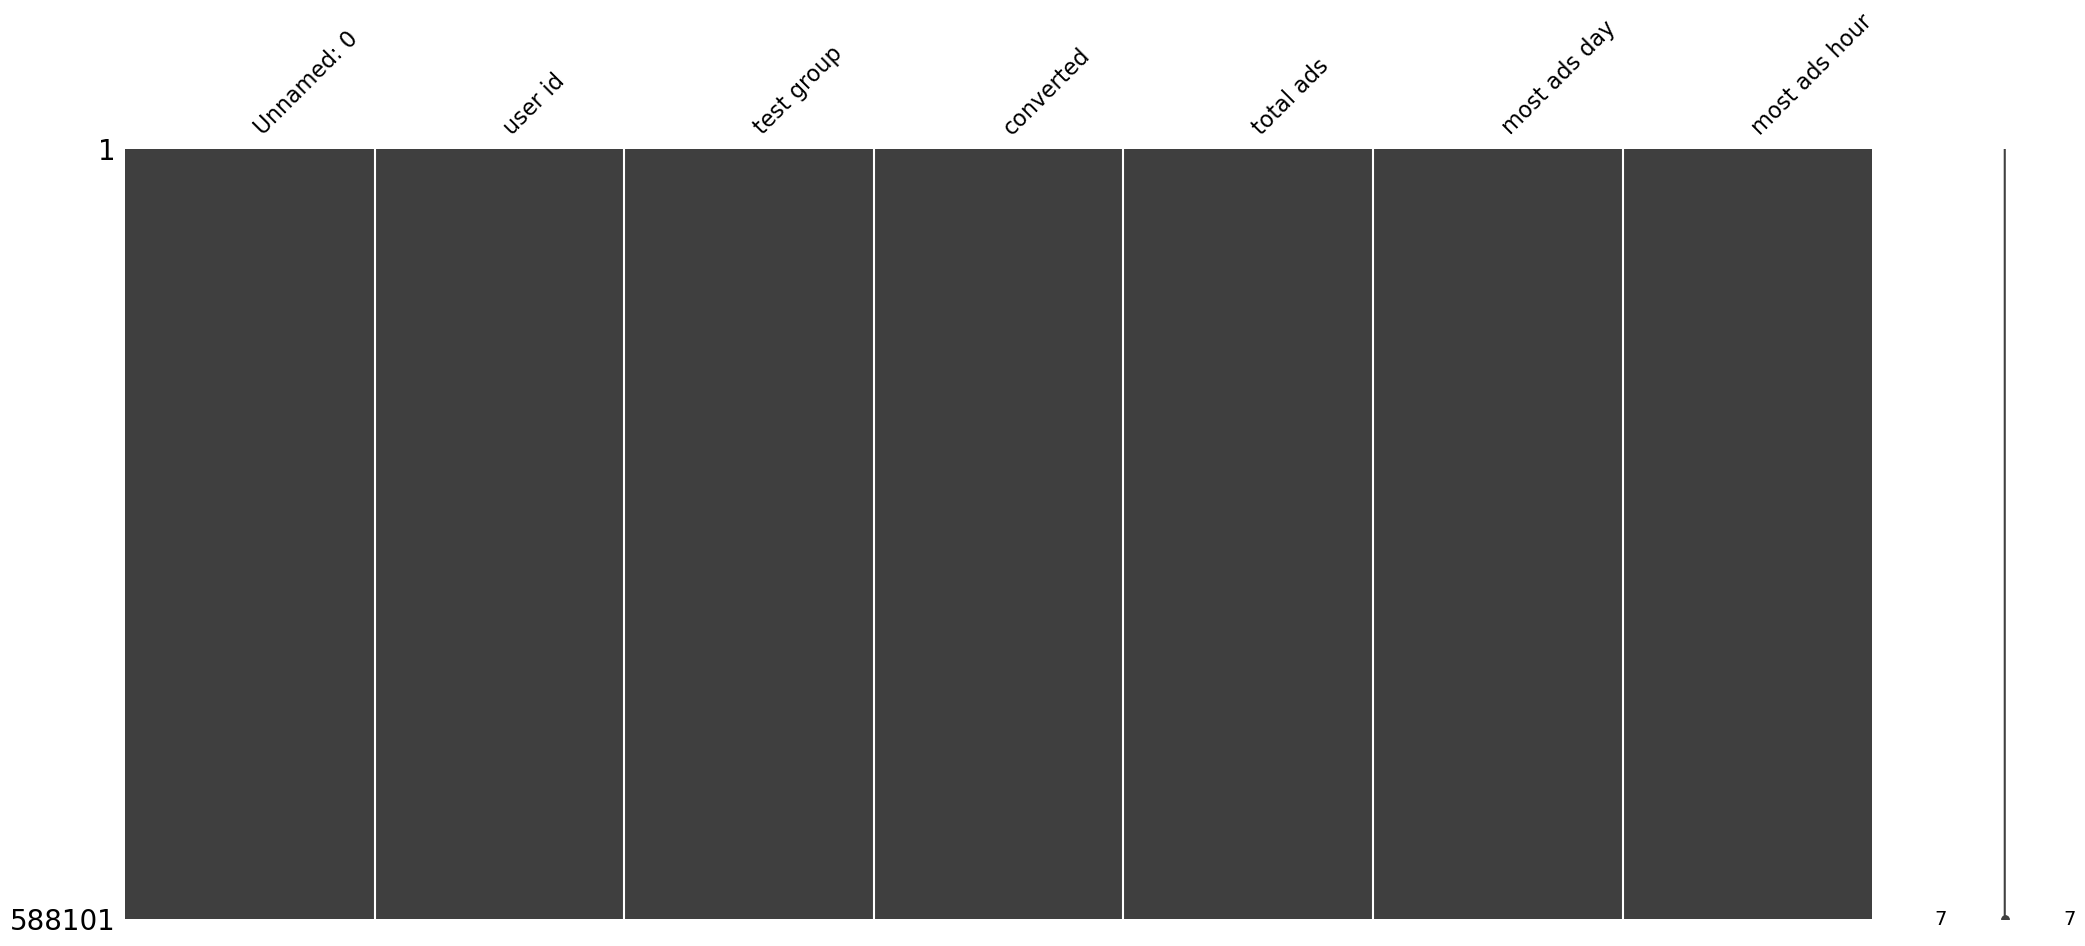

In [9]:
#mengecek missing value
msno.matrix(df)

tidak terdapat missing value dalam data

In [10]:
df.duplicated().sum()

0

tidak terdapat data yang terduplikasi

## HYPOTESIS TESTING

In [11]:
#mengimpor library hypotesis testing
from scipy.stats import levene, shapiro, ttest_ind, mannwhitneyu


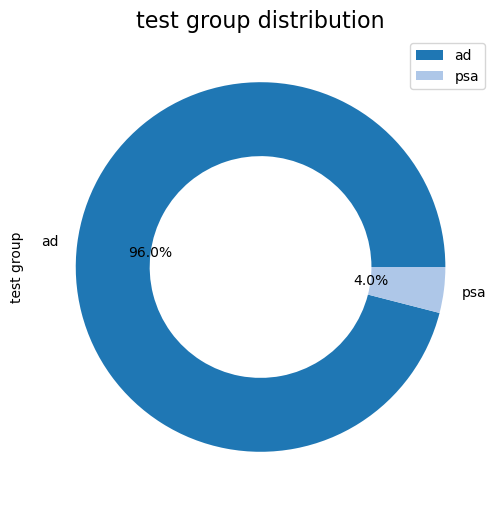

In [12]:
import seaborn as sns

plt.figure(figsize=(6, 6))
color_palette = sns.color_palette('tab20')
df['test group'].value_counts().plot.pie(autopct='%1.1f%%', colors=color_palette,

wedgeprops=dict(width=0.4))

plt.gca().set_aspect('equal')
plt.title('test group distribution', fontsize=16)
plt.legend(df['test group'].unique(), loc='best')
plt.show()

test group 'ad' berjumlah sebanyak 564577 record data atau sebanyak 96 persen, sedangkan test group 'psa' sebanyak 23524 record data atau sebesar 4 persen.

In [13]:
 #melakukan split data test group

ad = df[df['test group']=='ad'].reset_index(drop=True)
psa = df[df['test group']=='psa'].reset_index(drop=True)

### LANGKAH-LANGKAH A/B TESTING

##### PENGECEKAN ASUMSI DATA
- Cek Distribusi Data.
- jika Data Berdistribusi normal, di lanjutkan dengan memerikasa homogenitas data.

##### LANGKAH-LANGKAH ANALISIS
- menggunakan uji Shapiro-Wilk(Shapiro-Wilk test) untuk menguji normalitas data.
- jika data berdistribusi normal(parametrik), maka akan di lakukan uji levene guna menguji homogenitas varians.
- jika data berdistribusi normal(parametrik) dan homogenitas varians terpenuhi, gunakan uji T(T-test).
-jika data berdistribusi normal(parametrik) tetapi homogenitas varians tidak terpenuhi, gunakan uji T-Welch's(Welch's T-test).
-jika data tidak berdistribusi normal(non-parametrik), maka gunakan uji Mann Whitney U(Mann-Whitney U test).

### UJI SHAPIRO-WILK
uji Shapiro adalah metode statistik yang digunakan untuk menguji apakah sampel data memiliki distribusi normal. Distribusi normal (juga dikenal sebagai distribusi Gaussian) adalah salah satu distribusi yang paling umum digunakan dalam analisis statistik.

Hipotesis yang diuji dalam uji Shapiro adalah:

- Hipotesis Nol (H0): Sampel data berasal dari distribusi normal.
- Hipotesis Alternatif (H1): Sampel data tidak berasal dari distribusi normal.


In [14]:
#uji shapiro wilk
_, pvalue_ad = shapiro(ad.converted)
_, pvalue_psa = shapiro(psa.converted)

print("HASIL UJI SHAPIRO WILK")
alpha = 0.05
print("nilai p-value dari group test ad :", pvalue_ad)
if pvalue_ad < alpha :
    print("data ad tidak berdistribusi normal")
else :
    print("data ad berdistribusi normal")
    
print("nilai P-value dari group test psa :", pvalue_psa)
if pvalue_psa < alpha :
    print("data psa tidak berdistribusi normal")
else :
    print("data psa berdistribusi normal")

HASIL UJI SHAPIRO WILK
nilai p-value dari group test ad : 0.0
data ad tidak berdistribusi normal
nilai P-value dari group test psa : 0.0
data psa tidak berdistribusi normal


dari hasil uji shapiro-wilk dapat di ketahui test group 'psa' dan 'ad' tidak berdistribusi normal. maka hipotesis testing akan di lanjutkan dengan uji mann-whitney u untuk membandingkan dua kelompok data.

### UJI MANN-WHITNEY U
Uji Mann-Whitney U, juga dikenal sebagai Uji U atau Uji Wilcoxon-Mann-Whitney, adalah uji statistik non-parametrik yang digunakan untuk membandingkan dua sampel independen dari dua kelompok populasi yang mungkin memiliki distribusi yang berbeda. Uji ini sering digunakan ketika data tidak memenuhi asumsi normalitas atau ketika data berskala ordinal.

Hipotesis yang diuji dalam uji Shapiro adalah:

- Hipotesis Nol (H0): Tidak ada perbedaan yang signifikan antara dua kelompok populasi yang dibandingkan dalam distribusi variabel yang diukur.

- Hipotesis Alternatif (H1): Terdapat perbedaan yang signifikan antara dua kelompok populasi yang dibandingkan dalam distribusi variabel yang diukur.

In [15]:
# melakukan uji mann-whitney u
statistic, pvalue = mannwhitneyu(psa.converted, ad.converted)

print("HASIL UJI MANN-WHITNEY U")
print("nilai statistic :", statistic)
print("nilai p-value :", pvalue)

alpha = 0.05
if pvalue < alpha :
    print("terdapat perbedaan yang signifikan antara group psa dan ad")
else :
    print("tidak terdapat perbedaan yang signifikan antara group psa dan ad")


HASIL UJI MANN-WHITNEY U
nilai statistic : 6589472518.0
nilai p-value : 1.7053617930171878e-13
terdapat perbedaan yang signifikan antara group psa dan ad


dari uji mann-whitney u di ketatuhi bahwa terdapat perpedaan yang signifikan antara group 'ad' dan 'psa'.

### HASIL UJI HIPOTESIS
- dari hasil A/B testing di ketahui data group test 'ad' dan 'psa' bukan merupakan data berdistribusi normal dan dari uji mann-whitney u, terdapat perbedaan yang signifikan antara test group 'ad' dan 'psa'

## VISUALISASI DATA

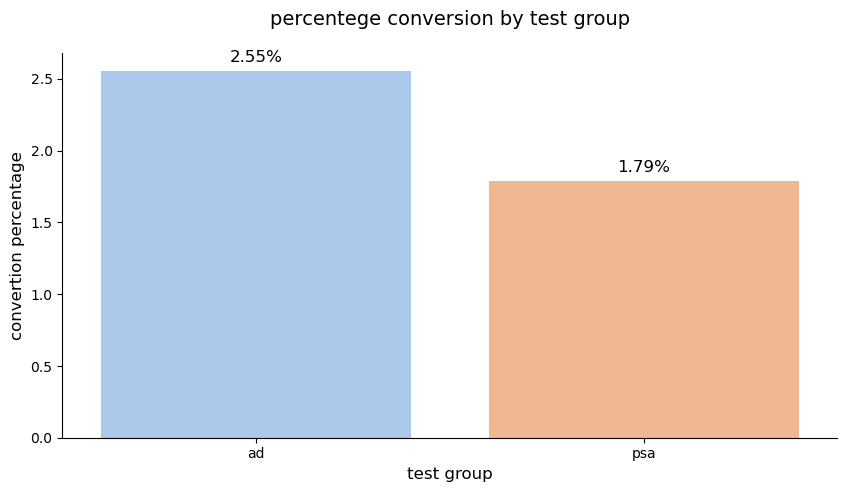

In [16]:
sns.set_palette('pastel')

plt.figure(figsize=(10,5))
ax = sns.barplot(data=df, x='test group', y='converted', estimator= lambda x: sum(x) / len(x) * 100, ci= None)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12, color='black')
    
plt.title('percentege conversion by test group', fontsize=14, pad=20)
plt.xlabel('test group', fontsize=12)
plt.ylabel('convertion percentage', fontsize=12)
sns.despine()
plt.tight_layout

plt.show()

- persentase conversi calon pelanggan untuk membeli produk dari test group 'ad' lebih tinggi dari 'psa'.

In [17]:
#membuat fungsi barplot dengan fungsi def
def barplot(data, x, y, title, xlabel, ylabel) :
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(data=data, x=x, y=y, estimator='mean', ci=None)
    
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=12, color='black')
    
    plt.title(title, fontsize=14, pad=20)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    
    sns.despine()
    plt.tight_layout()
    plt.show()

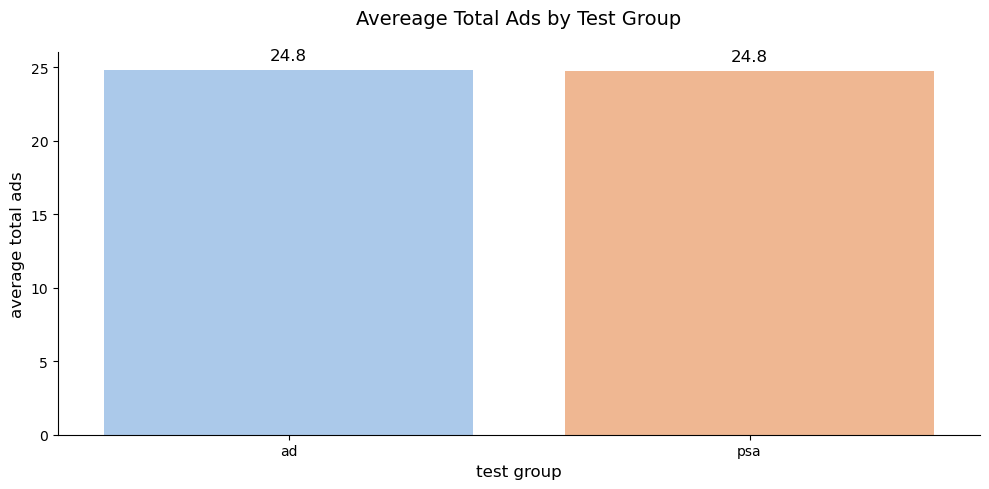

In [18]:
barplot(df, 'test group', 'total ads', 'Avereage Total Ads by Test Group', 'test group', 'average total ads')

 - rata-rata jumlah ads yang di terima oleh test group 'psa' dan 'ad' memiliki jumlah yang sama. 

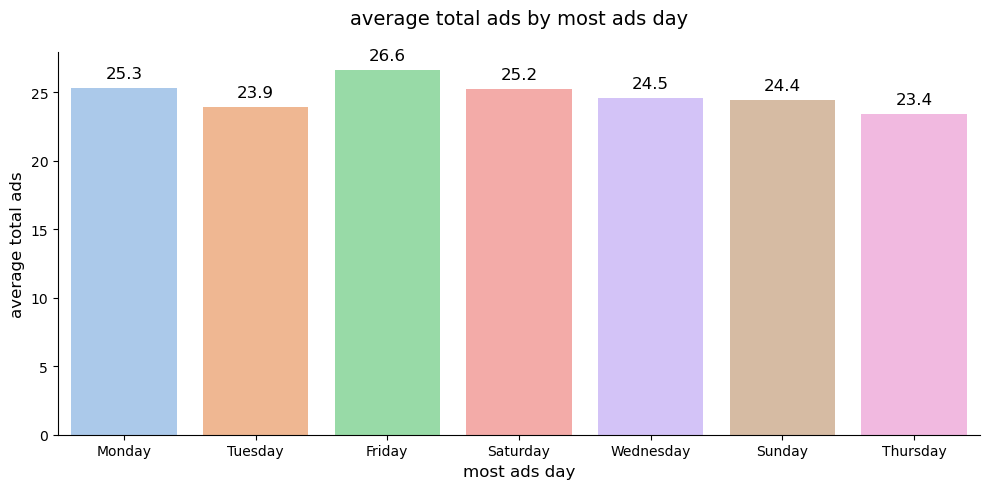

In [19]:
barplot(df, 'most ads day', 'total ads', 'average total ads by most ads day', 'most ads day', 'average total ads')

- jumlah iklan pada masing-masing hari hampir setara.

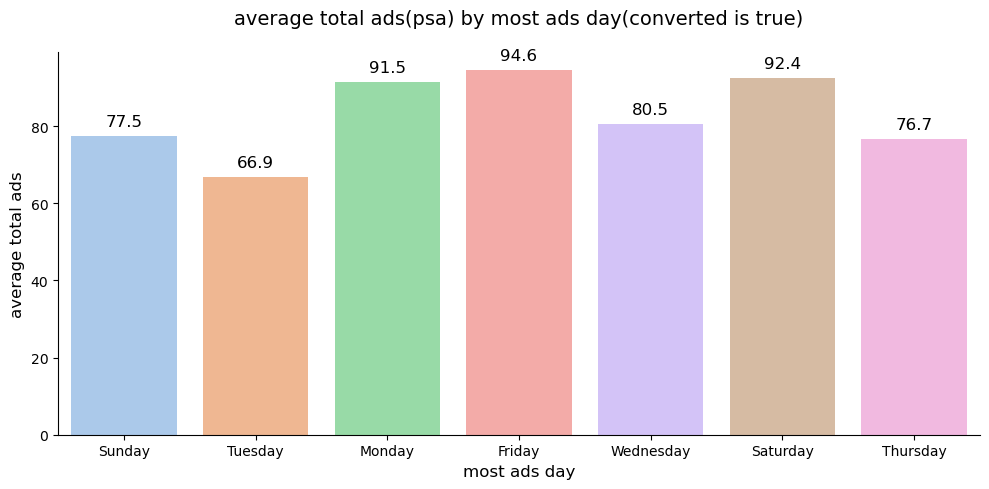

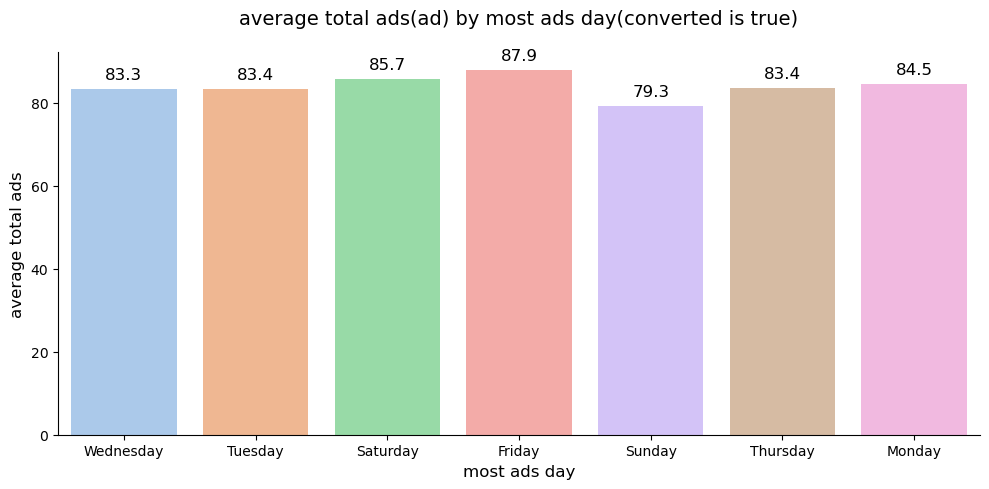

In [20]:
data = df.loc[(df['converted']==1) & (df['test group']=='psa')]
barplot(data, 'most ads day', 'total ads', 'average total ads(psa) by most ads day(converted is true)', 'most ads day', 'average total ads')

data = df.loc[(df['converted']==1) & (df['test group']=='ad')]
barplot(data, 'most ads day', 'total ads', 'average total ads(ad) by most ads day(converted is true)', 'most ads day', 'average total ads')

- konversi calon pelanggan yang membeli produk melalui iklan 'psa' dengan jumlah iklan yang lebih sedikit pada hari minggu, selasa dan kamis.
- konversi calon pelanggan yang membeli produk melalui iklan 'ad' memiliki jumlah iklan yang hampir pada masing-masing hari.
- semakin sedikit jumlah ads yang berhasil mengubah konversi pelanggan menjadi membeli produk maka ddapat di katakan semakin efektif.

In [21]:
df.sample(20)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
19320,19320,1211049,ad,0,84,Wednesday,13
22778,22778,1325722,ad,0,48,Wednesday,13
15775,15775,1311490,ad,0,94,Monday,8
573200,573200,1447275,ad,0,3,Sunday,16
197957,197957,909781,psa,0,8,Tuesday,15
378773,378773,1562237,ad,0,8,Wednesday,15
469620,469620,1240646,ad,0,6,Friday,13
538805,538805,1502556,ad,0,2,Sunday,18
271863,271863,1554832,ad,0,17,Wednesday,10
353305,353305,1058566,ad,0,16,Wednesday,11


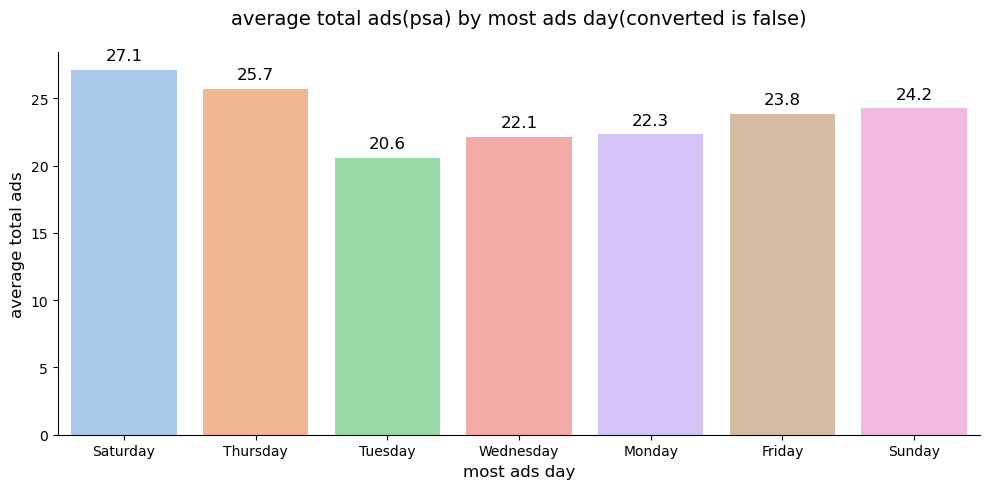

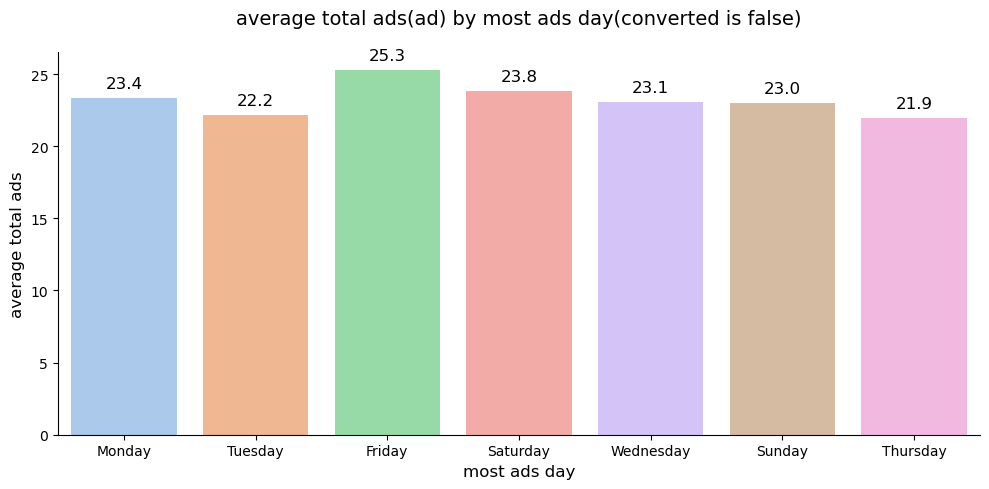

In [22]:
data = df.loc[(df['converted']==0) & (df['test group']=='psa')]
barplot(data, 'most ads day', 'total ads', 'average total ads(psa) by most ads day(converted is false)', 'most ads day', 'average total ads')

data = df.loc[(df['converted']==0) & (df['test group']=='ad')]
barplot(data, 'most ads day', 'total ads', 'average total ads(ad) by most ads day(converted is false)', 'most ads day', 'average total ads')

In [23]:
data1 = df[(df['test group']=='psa') & (df['converted']==0)]
data2 = df[(df['test group']=='ad') & (df['converted']==0)]

psa = data1['total ads'].mean()
ad = data2['total ads'].mean()

print("rata-rata total ads yang gagal menkonversikan pelanggan dari test group 'psa' sebesar {} dan test group 'ad' sebesar {}".format(psa, ad))

rata-rata total ads yang gagal menkonversikan pelanggan dari test group 'psa' sebesar 23.69741170360111 dan test group 'ad' sebesar 23.274448608934954


In [24]:
data1 = df[(df['test group']=='psa') & (df['converted']==1)]
data2 = df[(df['test group']=='ad') & (df['converted']==1)]

psa = data1['total ads'].mean()
ad = data2['total ads'].mean()

print("rata-rata total ads yang berhasil menkonverikan pelanggan menjadi membeli produk dari test group 'psa' sebesar {} dan test group 'ad' sebesar {}".format(psa, ad))

rata-rata total ads yang berhasil menkonverikan pelanggan menjadi membeli produk dari test group 'psa' sebesar 83.27619047619048 dan test group 'ad' sebesar 83.90556749635998


- dari plot di atas di dapat insight bahwa semakin sedikit jumlah iklan yang di terima oleh pelanggan maka akan semakin tinggi pula tingkat kegagalan dalam menghasilkan konversi pelanggan untuk membeli produk. 

## KESIMPULAN DAN SARAN

### KESIMPULAN
- jumlah test group 'ad' berjumlah sebanyak 564577 record data atau sebanyak 96 persen, sedangkan test group 'psa' sebanyak 23524 record data atau sebesar 4 persen.
- dari hasil A/B testing di ketahui data group test 'ad' dan 'psa' bukan merupakan data berdistribusi normal dan dari uji mann-whitney u, terdapat perbedaan yang signifikan antara test group 'ad' dan 'psa'.
- persentase conversi calon pelanggan untuk membeli produk dari test group 'ad' lebih tinggi dari 'psa'.
- konversi calon pelanggan yang membeli produk melalui iklan 'psa' dengan jumlah iklan yang lebih sedikit pada hari minggu, selasa dan kamis. semakin sedikit jumlah ads yang berhasil mengubah konversi pelanggan menjadi membeli produk maka ddapat di katakan semakin efektif.
- semakin sedikit jumlah iklan yang di terima oleh pelanggan maka akan gagal menghasilkan konversi pelanggan untuk membeli produk.

### SARAN
- berdasarkan A/B testing dan visualisasi, penggunaan iklan biasa lebih efektif dari iklan dalam bentuk Pengumuman Layanan Publik sehingga iklan pengumuman layanan publik perlu di evaluasi dalam penerapnya, namun masih harus di lihat lagi apakah biaya yang di keluarkan dari iklan dalam bentuk pengumuman layanan publik lebih rendah di bandingkan iklan biasa.  diperlulukan pertimbangkan yang matang dari sisi bisnis mulai dari biaya yang di keluarkan oleh perusahaan untuk biaya iklan dan lain-lain yang berkaitan guna mendukung efektifitas dan efisiensi biaya dan profitabilitas perusahaan yang optimal.